## Dataset Analysis

In [1]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(cwd), '.')) # Get the absolute path to the parent directory
sys.path.insert(0, parent_dir) # Add the parent directory to sys.path

In [2]:
parent_dir

'/home/joshua/Documents/phd/CompressionVAEHSI'

In [105]:
from src.data.bigearth_datamodule import BigEarthDataModule

dataset_dir = parent_dir + "/data" # root directory where to download the datasets
batch_size = 16

dm = BigEarthDataModule(dataset_dir=dataset_dir, batch_size=batch_size, bands='all')
dm.setup()

In [107]:
dm.setup_folds(5)
dm.setup_fold_index(0)
print("Number of train samples: ", len(dm.train_dataloader().dataset))
print("Number of validation samples: ", len(dm.val_dataloader().dataset))
print("Number of test samples: ", len(dm.test_dataloader().dataset))

Number of train samples:  332342
Number of validation samples:  83086
Number of test samples:  103857


In [49]:
batch = next(iter(dm.train_dataloader()))
x, y = batch.values()

In [50]:
batch['image'].shape

torch.Size([16, 12, 120, 120])

In [118]:
import matplotlib.pyplot as plt
import numpy as np

#TODO for reconstruction images we need the one-hot class decoder
def get_label_names(onehots, class_names):
    """get all the names when a label is a one-hot."""
    label_idx = np.where(onehots)[0]
    label_names = [class_names[idx] for idx in label_idx]
    return label_names

def display_image(ds, idx):
    #img = ds[idx]['data'].numpy()
    img = ds[idx]['image'].numpy()[2:5,:,:]
    labels = ds[idx]['label']
    for band in range(len(img)):
        # normalize based on min/max pixel values to clamp ranges in [0, 1]
        img[band, ...] = (img[band, ...] - np.min(img[band, ...])) / np.max(img[band, ...])
    
    img = np.moveaxis(img, 0, 2) # C, W, H > W, H, C
    img = img[:,:,::-1] # BGR to RGB
    
    #label_names = get_label_names(labels, ds.class_names) 

    #plt.title('\n'.join(label_names))
    plt.imshow(img)
    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

#ds = dm.val_dataloader().dataset
#for idx in [0, 12, 311, 776, 44]:
#    display_image(ds, idx)

In [113]:
ds = dm.val_dataloader().dataset
orig_img = ds[0]['image'].numpy()[2:5,:,:]
orig_img.shape

(3, 120, 120)

In [114]:
for band in range(len(orig_img)):
    # normalize based on min/max pixel values to clamp ranges in [0, 1]
    orig_img[band, ...] = (orig_img[band, ...] - np.min(orig_img[band, ...])) / np.max(orig_img[band, ...])

In [115]:
img = np.moveaxis(orig_img, 0, 2) # switchs from [14,120,120] to [120,120,14]
img.shape

(120, 120, 3)

In [91]:
brg_img = img[:,:,2:5] 

In [85]:
brg_img.shape

(120, 120, 1)

In [116]:
rgb_img = img[:,:,::-1]

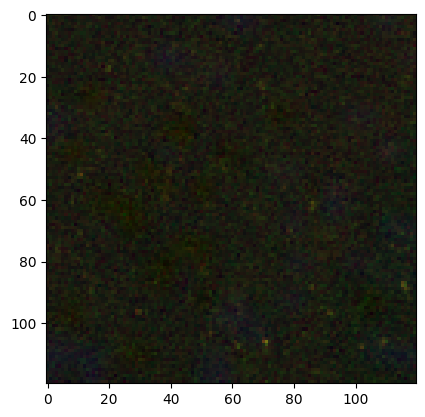

In [117]:
plt.imshow(rgb_img)

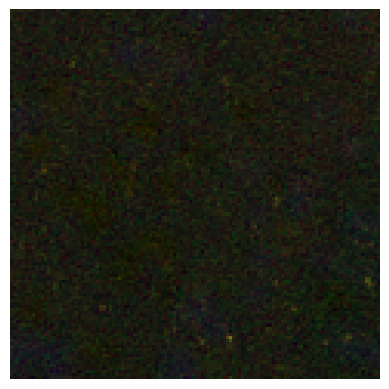

In [119]:
display_image(ds, 0)